# Summary statistics

In this notebook we check functions made to measure summary statistics on the output of the forward model.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt

import summary_statistic as sumstat

In [4]:
#Load an example simulation
path = '/n17data/sguerrini/GowerStreetSims/processed/forward_model_sim00002_nside0512_rot00_noisereal0.npy'

sim = np.load(path, allow_pickle=True).item()

In [12]:
for key, value in sim['cosmo_params'].items():
    print(f'{key}= {value[0]}')

h= 0.7165473754
Omega_m= 0.2496287584
Omega_b= 0.04350883101
sigma_8= 0.9504961601
n_s= 0.9513110688
w= -0.7924174042
m_nu= 0.06
A_s= 3.968190251995511e-09


/home/guerrini/.conda/envs/glass/lib/python3.10/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


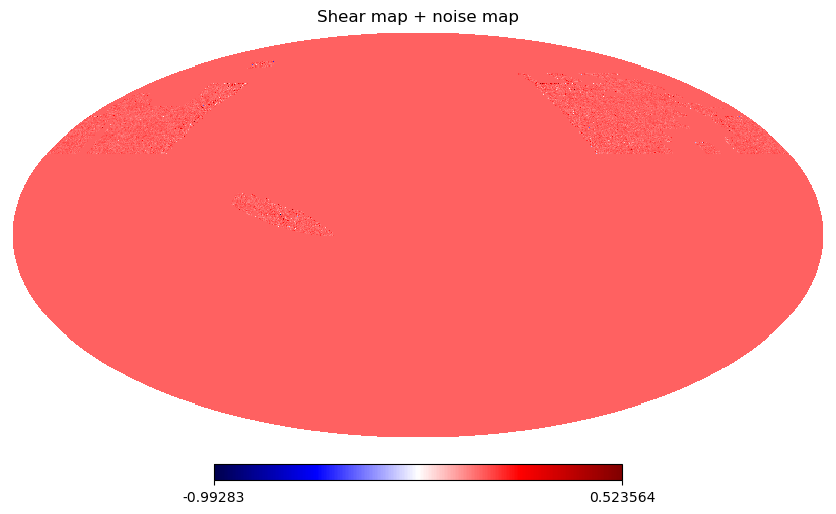

In [25]:
#Get the shear map for the bin 4
shear_idx = sim['bin_4']['masked_shear_map']
noise_idx = sim['bin_4']['noise_map']
idx = sim['bin_4']['idx']

nside = sim['config']['preprocessing']['nside']

shear_map = np.zeros(hp.nside2npix(nside), dtype=np.complex128)
noise_map = np.zeros(hp.nside2npix(nside), dtype=np.complex128)

shear_map[idx] += shear_idx + noise_idx
noise_map[idx] += noise_idx

hp.mollview(shear_map, title='Shear map + noise map', cmap='seismic')
plt.show()

### Pseudo-Cls

In [26]:
ell_eff, cl_shear = sumstat.get_pseudo_cls(shear_map, nside)
ell_eff, cl_noise = sumstat.get_pseudo_cls(noise_map, nside)


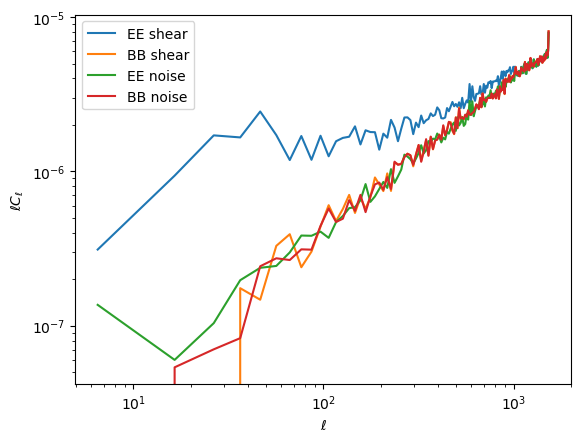

In [27]:
plt.figure()

plt.plot(ell_eff, ell_eff*cl_shear[0], label='EE shear')
plt.plot(ell_eff, ell_eff*cl_shear[3], label='BB shear')
plt.plot(ell_eff, ell_eff*cl_noise[0], label='EE noise')
plt.plot(ell_eff, ell_eff*cl_noise[3], label='BB noise')

plt.xlabel('$\ell$')
plt.ylabel('$\ell C_\ell$')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.show()

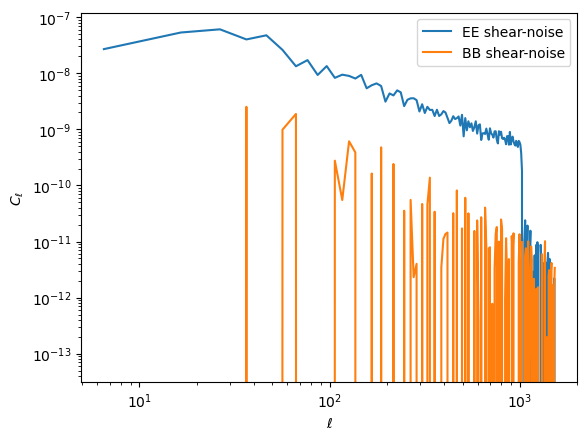

In [28]:
#Check against theory

plt.figure()

plt.plot(ell_eff, cl_shear[0]-cl_noise[0], label='EE shear-noise')
plt.plot(ell_eff, cl_shear[3]-cl_noise[3], label='BB shear-noise')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.show()